# Item 2 da Lista 3 - Regressão de Ridge e Lasso de comparação

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.base import clone
import matplotlib as mpl

%matplotlib inline

# Aplicação das operações necessárias ( alvo e ruído)

In [43]:
M  = 100
np.random.seed(42)
def target_function(M, x):
    y = 2 + x + 0.5*x**2  # de acordo com o proposto na atividade
    return y

x = 6*np.random.rand(M, 1) - 3
y = 2 + x + 0.5*x**2
y_noisy = y + np.random.randn(M, 1)
Mtest = 100
x_test = np.linspace(-3, 3, Mtest).reshape(Mtest, 1) #conforme orientações presentes na atividade
y_test = target_function(Mtest, x_test) + np.random.randn(Mtest, 1)

In [44]:
#Tentativa de utilização da função conforme proposto na atividade

x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=0.7, random_state=42)

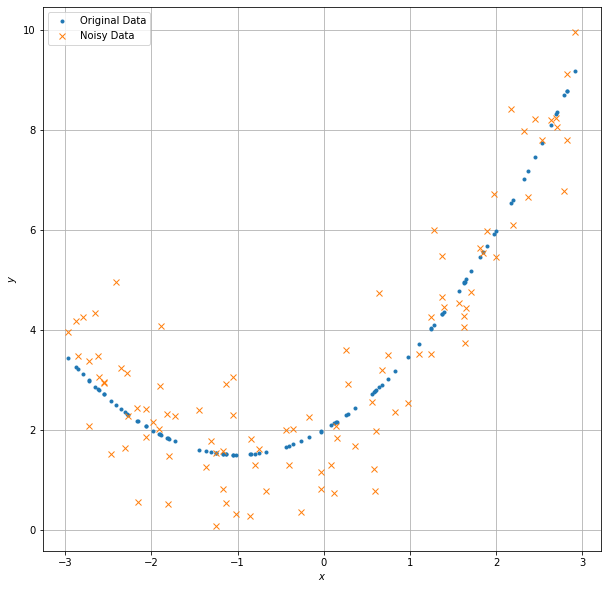

In [45]:
# Em ateção à letra A desta atividade

fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Original Data')
plt.plot(x, y_noisy, 'x', label='Noisy Data')
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.legend()
plt.grid()
plt.show()

In [46]:
# Definição de ordem polinomial
model_order = 90

In [47]:
# Criação do teste para cada um dos 1000 valores de λ e definição do fator de regularização (eu creio que é isso)
lambdas = np.linspace(1*10**-11, 1, 1000)

In [48]:
# Aplicando a biblioteca SciKit-Learn - LA2SO

include_bias = True

train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
       
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    scaler = StandardScaler()
    reg = Lasso(alpha=lambdas[i], tol=1, random_state=42) if lambdas[i] > 0 else LinearRegression()
    model = Pipeline([("poly_features", poly_features),("scaler", scaler),("reg", reg),])
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('Best lambda value:',best_lambda)
print('Minimum error value:',minimum_val_error)

Best lambda value: 0.025025025034774776
Minimum error value: 0.7682727062261462


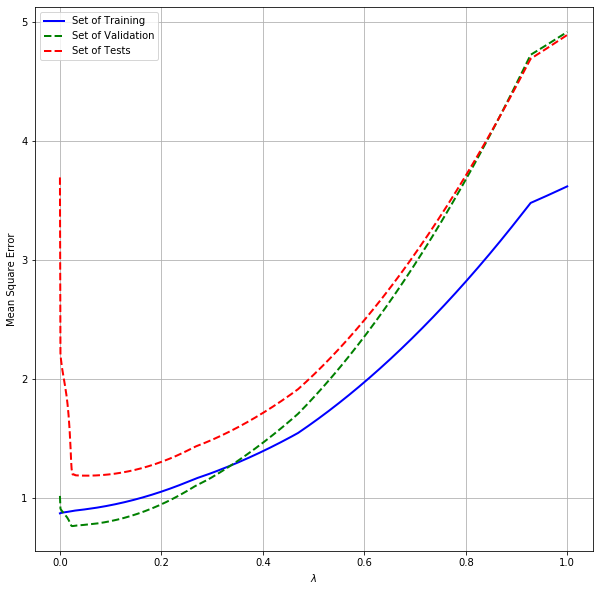

In [49]:
fig = plt.figure(figsize=(10,10))
plt.plot(lambdas, train_errors, "b-", linewidth=2, label="Set of Training")
plt.plot(lambdas, val_errors, "g--", linewidth=2, label="Set of Validation")
plt.plot(lambdas, test_errors, "r--", linewidth=2, label="Set of Tests")
plt.legend(loc="upper left", fontsize=10)
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel("Mean Square Error", fontsize=10)
plt.grid()
plt.show()

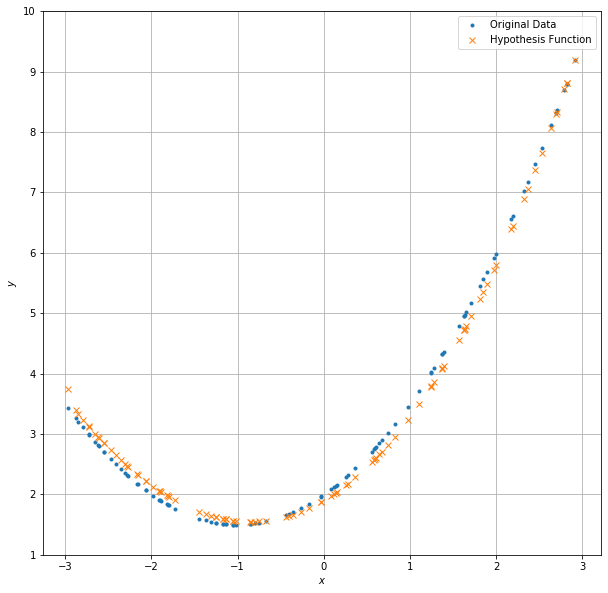

In [50]:
best_model.fit(x_train, y_train)
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Original Data')
plt.plot(x, best_model.predict(x), 'x', label='Hypothesis Function')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.legend(fontsize=10)
plt.grid()
plt.show()

In [51]:
# Valores obtidos no treinamento
print('Lambda: %1.4e:' % (best_lambda))
print(best_model.named_steps['reg'].intercept_)
print(best_model.named_steps['reg'].coef_)

Lambda: 2.5025e-02:
[3.18408431]
[ 0.00000000e+00  1.45443084e+00  1.32226893e+00  1.81617592e-01
  9.36214159e-03 -7.73484247e-03  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000

In [52]:
# Aplicando SciKit-Learn closed-form e minimum_val_error

train_errors, val_errors, test_errors = [], [], []
minimum_val_error = float("inf") # conforme a dica da lista#3 item d.
best_epoch = None
best_model = None
best_lambda = None

for i in range(0,len(lambdas)):
    poly_features = PolynomialFeatures(degree=model_order, include_bias=include_bias)
    scaler = StandardScaler()
    reg = Ridge(alpha=lambdas[i], tol=1)
    model = Pipeline([("poly_features", poly_features),("scaler", scaler),("reg", reg),])
    model.fit(x_train, y_train)
    y_train_predict = model.predict(x_train)
    y_val_predict = model.predict(x_val)
    y_test_predict = model.predict(x_test)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))
    
    if val_errors[i] < minimum_val_error:
        minimum_val_error = val_errors[i]
        best_epoch = i
        best_model = clone(model)
        best_lambda = lambdas[i]
        
print('Best lambda value:',best_lambda)
print('Minimum error value:',minimum_val_error)

Best lambda value: 0.1431431431517117
Minimum error value: 114.44272046109724


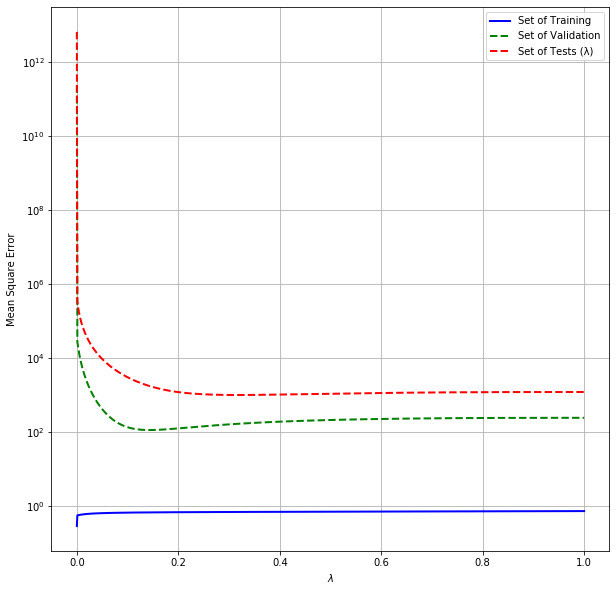

<Figure size 720x720 with 0 Axes>

In [53]:
# Aqui vamos atender à letra E, erros de treinamento e validação versus valores de λ

fig = plt.figure(figsize=(10,10))
plt.plot(lambdas, train_errors, "b-", linewidth=2, label="Set of Training")
plt.plot(lambdas, val_errors, "g--", linewidth=2, label="Set of Validation")
plt.plot(lambdas, test_errors, "r--", linewidth=2, label="Set of Tests (λ)")
plt.legend(loc="upper right", fontsize=10)
plt.yscale('log')
plt.xlabel('$\lambda$', fontsize=10)
plt.ylabel("Mean Square Error", fontsize=10)
plt.grid()
plt.show()
fig = plt.figure(figsize=(10,10))

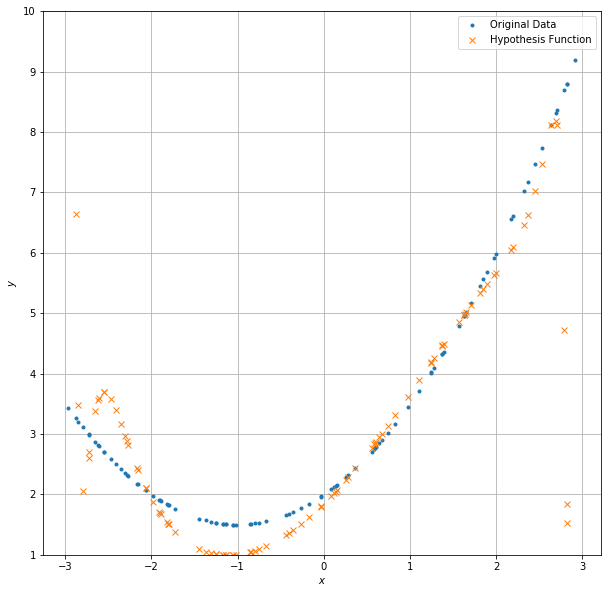

In [54]:
# Aqui vamos atender à letra g.

best_model.fit(x_train, y_train)
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.', label='Original Data')
plt.plot(x, best_model.predict(x), 'x', label='Hypothesis Function')
plt.ylim([1, 10])
plt.xlabel('$x$', fontsize=10)
plt.ylabel('$y$', fontsize=10)
plt.legend(fontsize=10)
plt.grid()
plt.show()

In [55]:
# Aqui vamos atender as letras h,i,j com as orientações relacionadas ao "best_model.named_steps"

print('Lambda: %1.4e:' % (best_lambda))
print(best_model.named_steps['reg'].intercept_)
print(best_model.named_steps['reg'].coef_)

Lambda: 1.4314e-01:
[3.18408431]
[[ 0.          2.45407197  1.29275468 -0.72289254 -0.29802956 -0.67807698
   0.07481739 -0.29131335  0.3456792  -0.02346035  0.37131758  0.13008696
   0.27335943  0.21589795  0.14239846  0.26014553  0.02218748  0.27481103
  -0.07097428  0.26663309 -0.13421845  0.2411169  -0.17065213  0.20354616
  -0.1856151   0.15887775 -0.18481339  0.11142186 -0.17342153  0.06462199
  -0.15571004  0.02099145 -0.13496279 -0.01782707 -0.11354735 -0.05093052
  -0.09305518 -0.07799673 -0.07446211 -0.09912764 -0.05828164 -0.11471086
  -0.04469754 -0.12530682 -0.03367148 -0.13156219 -0.02502593 -0.13414719
  -0.01850539 -0.13371299 -0.01381969 -0.13086475 -0.01067325 -0.12614649
  -0.00878377 -0.12003454 -0.00789313 -0.1129366  -0.00777293 -0.10519474
  -0.00822627 -0.09709049 -0.00908722 -0.08885113 -0.01021878 -0.08065643
  -0.01151013 -0.07264525 -0.01287341 -0.06492182 -0.01424064 -0.05756145
  -0.01556059 -0.05061565 -0.01679602 -0.0441166  -0.01792113 -0.03808099
  -0.

# Fim das operações e resultados